The advantages of support vector machines are:

Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.

Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

If the number of features is much greater than the number of samples, the method is likely to give poor performances.

SVM do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

In [93]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [94]:
from sklearn import datasets

# load the iris datasets
iris = datasets.load_iris()

# Grab features (X) and the Target (Y)
X = iris.data
Y = iris.target

In [95]:
# Support Vector Machine Imports
import sklearn
from sklearn.svm import SVC

In [96]:
model=SVC()

In [97]:
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.2)

In [32]:
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
from sklearn import metrics

In [34]:
predicted=model.predict(X_test)

expected=Y_test

In [35]:
print(metrics.accuracy_score(expected,predicted))

0.966666666667


# Different Kernel Methods for SVM

In [36]:
from sklearn import svm

In [37]:
X=iris.data[:,:2]
Y=iris.target

In [39]:
C=1.0 # regualization

In [40]:
svc=svm.SVC(kernel='linear',C=C).fit(X,Y)

In [41]:
rbf_svc=svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

In [42]:
poly_svc=svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)

In [43]:
lin_svc=svm.LinearSVC(C=C).fit(X,Y)

In [44]:
h=0.02
# X axis min and max
x_min=X[:,0].min()-1
x_max=X[:,0].max()+1

In [45]:
# Y axis min and max
y_min=X[:,1].min()-1
y_max=X[:,1].max()+1

In [69]:
#创建网格图打底
xx,yy=np.meshgrid(np.arange(x_min,x_max),np.arange(y_min,y_max))

print(xx)
print(yy)

print(xx.ravel()) #将多维数组降维的方法
print(yy.ravel())

print(np.c_[xx.ravel(),yy.ravel()])

[[ 3.3  4.3  5.3  6.3  7.3  8.3]
 [ 3.3  4.3  5.3  6.3  7.3  8.3]
 [ 3.3  4.3  5.3  6.3  7.3  8.3]
 [ 3.3  4.3  5.3  6.3  7.3  8.3]
 [ 3.3  4.3  5.3  6.3  7.3  8.3]]
[[ 1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.  5.]]
[ 3.3  4.3  5.3  6.3  7.3  8.3  3.3  4.3  5.3  6.3  7.3  8.3  3.3  4.3  5.3
  6.3  7.3  8.3  3.3  4.3  5.3  6.3  7.3  8.3  3.3  4.3  5.3  6.3  7.3  8.3]
[ 1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.
  4.  4.  4.  4.  4.  4.  5.  5.  5.  5.  5.  5.]
[[ 3.3  1. ]
 [ 4.3  1. ]
 [ 5.3  1. ]
 [ 6.3  1. ]
 [ 7.3  1. ]
 [ 8.3  1. ]
 [ 3.3  2. ]
 [ 4.3  2. ]
 [ 5.3  2. ]
 [ 6.3  2. ]
 [ 7.3  2. ]
 [ 8.3  2. ]
 [ 3.3  3. ]
 [ 4.3  3. ]
 [ 5.3  3. ]
 [ 6.3  3. ]
 [ 7.3  3. ]
 [ 8.3  3. ]
 [ 3.3  4. ]
 [ 4.3  4. ]
 [ 5.3  4. ]
 [ 6.3  4. ]
 [ 7.3  4. ]
 [ 8.3  4. ]
 [ 3.3  5. ]
 [ 4.3  5. ]
 [ 5.3  5. ]
 [ 6.3  5. ]
 [ 7.3  5. ]
 [ 8.3  5. ]]


In [77]:
import pandas as pd
data=pd.DataFrame({'x1':xx.ravel(),'x2':yy.ravel()})
data

,x1,x2
0,3.3,1.0
1,4.3,1.0
2,5.3,1.0
3,6.3,1.0
4,7.3,1.0
5,8.3,1.0
6,3.3,2.0
7,4.3,2.0
8,5.3,2.0
9,6.3,2.0


In [78]:
pred=svc.predict(data)

In [86]:
pred=pred.reshape(xx.shape)
pred

array([[1, 1, 1, 1, 2, 2],
       [0, 1, 1, 1, 2, 2],
       [0, 0, 1, 2, 2, 2],
       [0, 0, 0, 0, 2, 2],
       [0, 0, 0, 0, 2, 2]])

In [91]:
X

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1],
       [ 5.4,  3.7],
       [ 4.8,  3.4],
       [ 4.8,  3. ],
       [ 4.3,  3. ],
       [ 5.8,  4. ],
       [ 5.7,  4.4],
       [ 5.4,  3.9],
       [ 5.1,  3.5],
       [ 5.7,  3.8],
       [ 5.1,  3.8],
       [ 5.4,  3.4],
       [ 5.1,  3.7],
       [ 4.6,  3.6],
       [ 5.1,  3.3],
       [ 4.8,  3.4],
       [ 5. ,  3. ],
       [ 5. ,  3.4],
       [ 5.2,  3.5],
       [ 5.2,  3.4],
       [ 4.7,  3.2],
       [ 4.8,  3.1],
       [ 5.4,  3.4],
       [ 5.2,  4.1],
       [ 5.5,  4.2],
       [ 4.9,  3.1],
       [ 5. ,  3.2],
       [ 5.5,  3.5],
       [ 4.9,  3.1],
       [ 4.4,  3. ],
       [ 5.1,  3.4],
       [ 5. ,  3.5],
       [ 4.5,  2.3],
       [ 4.4,  3.2],
       [ 5. ,  3.5],
       [ 5.1,  3.8],
       [ 4.8,  3. ],
       [ 5.1,  3.8],
       [ 4.6,

In [92]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

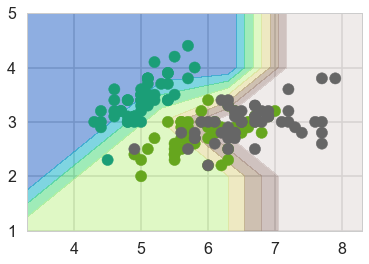

In [90]:
plt.contourf(xx,yy,pred,cmap=plt.cm.terrain,alpha=0.5)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)

In [47]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

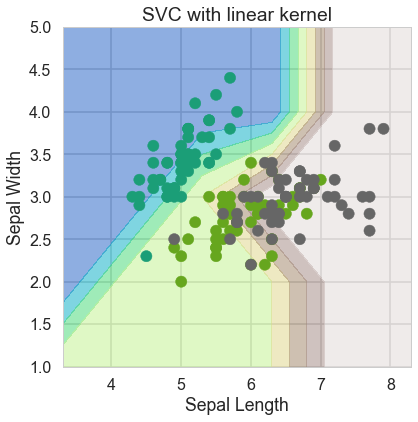

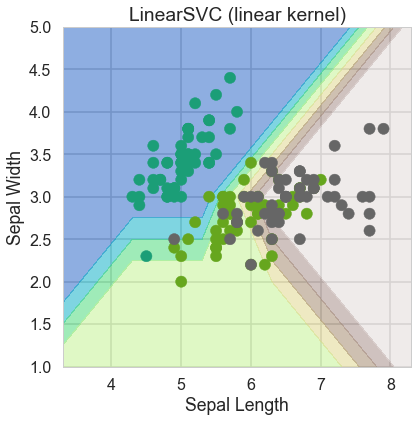

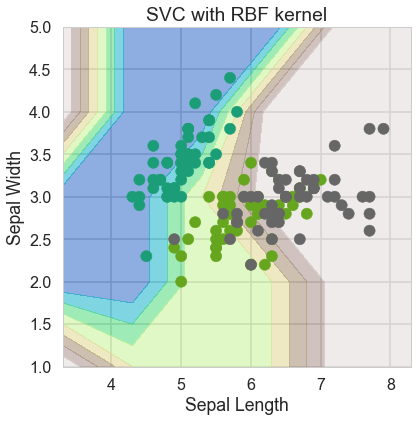

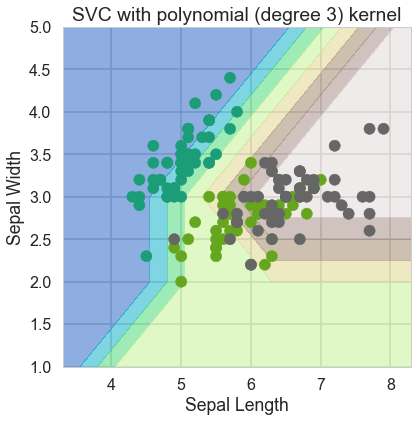

In [57]:
for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    
    plt.figure(figsize=(15,15))
    
    plt.subplot(2,2,i+1)
    
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    
    # Define Z as the prediction, not the use of ravel to format the arrays
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z=Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5)
    
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal Length')
    
    plt.ylabel('Sepal Width')
    
    plt.xlim(xx.min(),xx.max())
    
    plt.ylim(yy.min(),yy.max())
    
    #plt.xticks()
    #plt.yticks()
    plt.title(titles[i])
    